# Exploratory Data Analysis.

* Exploring the dataset to see what we're dealing with here.

### Step 1: Loading the modules and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
pd.options.display.max_columns = 32
plt.style.use('fivethirtyeight')

In [2]:
xg1 = pd.read_csv('xgdata.csv') # df to add features to main df
xg = pd.read_csv('finalxgdata.csv') # main df to use

#adding some features for visual EDA
xg['shotX'],xg['shotY']=xg1['shotX'],xg1['distY']

# adding some noise to better visualise the shots
list1 = np.random.rand(len(xg))
list2 = np.random.rand(len(xg))
list1 = list1 - 0.5
list2 = list2 - 0.5
xg1['list1'] = list1
xg1['list2'] = list2
xg1['list3'] = 12*np.ones(len(xg))
xg['shotX'],xg['shotY']=xg['shotX']+xg1['list1'],xg['shotY']+xg1['list2']
xg['shotY'] = xg1['list3'] - xg['shotY']

# adding a 'minute' feature to add another layer of analysis
xg1['minute']=xg1.Click.str[:2].astype(int)

# test code
# dftest = xg[xg['shotDist'] > 6 ]
# dftest.head(30)

In [3]:
# calculating goalface coordinates for plotting shots on the goal.

keys = ['s{}'.format(i) for i in range(1, 25)]
keys1 = ['OT {}'.format(i) for i in range(1, 9)]
for item in keys1:
    keys.append(item)
    
values = []
values1 = [[_,4] for _ in range(1,7)]
values2 = [[_,3] for _ in range(1,7)]
values3 = [[_,2] for _ in range(1,7)]
values4 = [[_,1] for _ in range(1,7)]
values5 = [[-1,1.5],[-1,3.5],[-1,5],[2,5],[5,5],[8,5],[8,3.5],[8,1.5]]

for _ in values1,values2,values3,values4,values5:
    values.append(_)

valuesf = []
for x in range(0,5):
    for item in values[x]:
        valuesf.append(item)

goalDict = dict(zip(keys, valuesf))
xg1['goalLoc1'] = xg1['goalLoc'].apply(lambda _: goalDict[_])

#adding some noise
listf = [list(x) for x in zip(list1,list2)]
xg1['listf'] = listf         
xg1['goalLoc2'] = xg1.apply(lambda row: [row.goalLoc1[0] + row.listf[0], 5 - row.goalLoc1[1] + row.listf[1]], axis=1)
xg1.head()


,indx,N,Category,Start,Click,End,Descriptors,Des_1,Des_2,Des_3,Des_4,Des_5,Des_6,shotXPrelim,shotYPrelim,shotX,...,isBigChance,isCounter,isTapIn,prevD5,prevD6,prevCat,isThroughball,isGround,goalLoc,minute,list1,list2,list3,goalLoc1,listf,goalLoc2
0,9,1.0,R Goal,53:47:04,53:49:04,53:50:04,NaN,TG,e8,s11,Long Range,NaN,NaN,e,8,5,...,0,0,0,NaN,NaN,L Unsucc Pass,0,0,s11,53,0.064162,0.167195,12.0,"[5, 3]","[0.0641619395770715, 0.16719523812135617]","[5.064161939577072, 2.167195238121356]"
1,12,2.0,R Goal,54:11:03,54:13:03,54:14:03,NaN,B3,f11,s17,NaN,NaN,NaN,f,11,6,...,0,0,0,NaN,NaN,R Grounded Pass,0,1,s17,54,0.490663,-0.345172,12.0,"[5, 2]","[0.49066262472548194, -0.34517167149635675]","[5.490662624725482, 2.654828328503643]"
2,17,1.0,L Shot On,54:34:03,54:36:03,54:37:03,NaN,G4,g4,s21,NaN,NaN,NaN,g,4,7,...,0,0,0,NaN,NaN,R Grounded Pass,0,1,s21,54,0.456224,-0.289729,12.0,"[3, 1]","[0.45622366324469243, -0.28972905517724135]","[3.4562236632446925, 3.7102709448227587]"
3,21,1.0,R Shot On,55:06:24,55:08:24,55:09:24,NaN,G4,d4,s16,NaN,NaN,NaN,d,4,4,...,0,0,0,NaN,NaN,L Grounded Pass,0,1,s16,55,-0.296516,-0.005346,12.0,"[4, 2]","[-0.296515720615957, -0.005346330105410191]","[3.703484279384043, 2.99465366989459]"
4,25,2.0,R Shot On,55:20:07,55:22:07,55:23:07,NaN,B2,e10,s21,NaN,NaN,NaN,e,10,5,...,0,0,0,Through Ball,NaN,R Grounded Pass,1,1,s21,55,-0.176515,-0.332583,12.0,"[3, 1]","[-0.17651489150917543, -0.3325828301050251]","[2.8234851084908246, 3.667417169894975]"


### Step 2: Preliminary data analysis.

In [4]:
xg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shotDist       479 non-null    float64
 1   shotAng        479 non-null    float64
 2   isOnTarget     479 non-null    int64  
 3   isGoal         479 non-null    int64  
 4   isHeader       479 non-null    int64  
 5   isBigChance    479 non-null    int64  
 6   isCounter      479 non-null    int64  
 7   isTapIn        479 non-null    int64  
 8   isThroughball  479 non-null    int64  
 9   isGround       479 non-null    int64  
 10  goalLoc        479 non-null    object 
 11  minute         479 non-null    int64  
 12  shotX          479 non-null    float64
 13  shotY          479 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 50.6+ KB


In [5]:
xg.describe()

,shotDist,shotAng,isOnTarget,isGoal,isHeader,isBigChance,isCounter,isTapIn,isThroughball,isGround,minute,shotX,shotY
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,3.238865,66.581632,0.772443,0.475992,0.012526,0.171190,0.008351,0.052192,0.064718,0.665971,42.425887,4.953028,9.155342
std,1.511583,17.651181,0.419694,0.499945,0.111333,0.377069,0.091095,0.222647,0.246285,0.472143,19.515958,1.643449,1.460948
min,1.000000,18.434949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.516646,1.489988
25%,2.236068,56.309932,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.500000,3.804054,8.647210
50%,3.000000,63.434949,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,48.000000,5.052147,9.403051
75%,4.061553,85.934949,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,57.000000,6.055791,10.130196
max,11.000000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,73.000000,9.113698,11.484993


### Step 3: Visual EDA.

In [6]:
from matplotlib.patches import Arc

In [7]:
# plotting shots on to a pitch

def pitch_creator(size=(10,7)):
    with plt.style.context('bmh'):
        fig = plt.figure(figsize=size)
        plt.axis([-0.5, 12.5, -0.5, 10.6])
        plt.grid(False)


        plt.plot([0, 0], [-0.2, 10.2], color='black')
        plt.plot([11.5, 11.5], [-0.2, 10.2], color="black")
        plt.plot([0, 11.5], [-0.2, -0.2], color='black')
        plt.plot([0, 11.5], [10.2, 10.2], color='black')

        centreCircle = plt.Circle((0, 5.05), 1, color='black', fill=False)

        # right penalty area
        plt.plot([11.5, 10], [2, 2], color='black')
        plt.plot([10, 10], [2, 8], color='black')
        plt.plot([10, 11.5], [8, 8], color='black')

        # right six yard box
        plt.plot([11.5, 11], [4, 4], color='black')
        plt.plot([11, 11], [4, 6], color='black')
        plt.plot([11, 11.5], [6, 6], color='black')


        # right goal posts
        plt.plot([11.5, 11.7], [4.5, 4.5], color='black')
        plt.plot([11.5, 11.7], [5.5, 5.5], color='black')
        plt.plot([11.7, 11.7], [4.5, 5.5], color='black')


        # right Arc
        rightArc = Arc((10.55, 5.05), height=1.83, width=1.83, angle=0,
                       theta1=130, theta2=230, color='black')

        ax = plt.gca()
        ax.add_patch(centreCircle)
        ax.add_patch(rightArc)
        ax.set_ylim(ax.get_ylim()[::-1])
        return fig

def plotter(fig,loc_list,color,label):
    
    loc_x=[]
    loc_y=[]
    for loc in loc_list:
        loc_x.append(loc[0])
        loc_y.append(loc[1])
            
    plt.scatter(loc_x,loc_y,c=color,alpha=1,label=label,edgecolor='black',linewidth=0.5)
    plt.axis('off')
    
    
    return fig

In [8]:
def goal_creator(size=(10,7)):
    with plt.style.context('bmh'):
        fig = plt.figure(figsize=size)
        plt.axis([-1, 8, 0, 5.5])
        plt.grid(True)

        plt.plot([0.35, 0.35], [0.5, 4.7], color='black')
        plt.plot([6.65, 6.65], [0.5, 4.7], color="black")
        plt.plot([0.34, 6.65], [0.5, 0.5], color='black')
        #plt.plot([0, 7], [4.2, 4.2], color='black')
        
        ax = plt.gca()
        ax.set_ylim(ax.get_ylim()[::-1])
        return fig
    
def goalplotter(fig,loc_list,color,label):
    
    loc_x=[]
    loc_y=[]
    for loc in loc_list:
        loc_x.append(loc[0])
        loc_y.append(loc[1])
            
    plt.scatter(loc_x,loc_y,c=color,alpha=1,label=label,edgecolor='black',linewidth=0.5)
    plt.axis('off')
    
    
    return fig

In [9]:
def goal_creator1(size=(10,7)):
    with plt.style.context('bmh'):
        fig = plt.figure(num=2, figsize=(20,7))
        plt.axis([-1, 18, 0, 5.5])
        plt.grid(True)

        plt.plot([0.35, 0.35], [0.5, 4.7], color='black')
        plt.plot([6.65, 6.65], [0.5, 4.7], color="black")
        plt.plot([0.35, 6.65], [0.5, 0.5], color='black')

        plt.plot([10.35, 10.35], [0.5, 4.7], color='black')
        plt.plot([16.65, 16.65], [0.5, 4.7], color="black")
        plt.plot([10.35, 16.65], [0.5, 0.5], color='black')


        #plt.plot([0, 7], [4.2, 4.2], color='black')

        ax = plt.gca()
        ax.set_ylim(ax.get_ylim()[::-1])
        return fig
    
def goalplotter(fig,loc_list,color,label):
    
    loc_x=[]
    loc_y=[]
    loc_x1=[]
    for loc in loc_list:
        loc_x.append(loc[0])
        loc_y.append(loc[1])
    for i in loc_x:
        val = i+10
        loc_x1.append(val)
            
    plt.scatter(loc_x1,loc_y,c=color,alpha=1,label=label,edgecolor='black',linewidth=0.5)
    plt.axis('off')
    
    
    return fig

def goalplotter1(fig,loc_list,color,label):
    
    loc_x=[]
    loc_y=[]
    for loc in loc_list:
        loc_x.append(loc[0])
        loc_y.append(loc[1])
            
    plt.scatter(loc_x,loc_y,c=color,alpha=1,label=label,edgecolor='black',linewidth=0.5)
    plt.axis('off')
    
    
    return fig

The probability of any shot turning into a goal is 47.6 %.


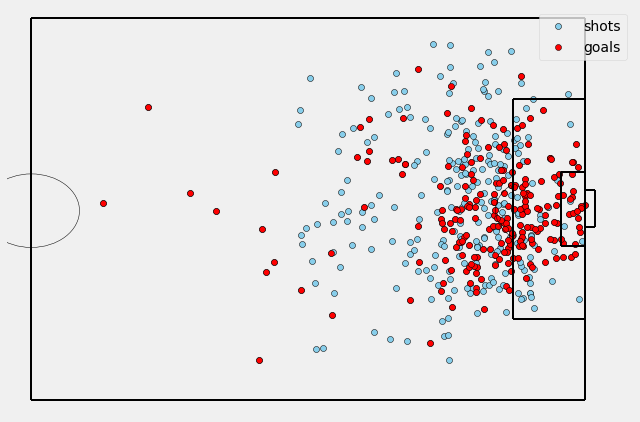

In [10]:
#plotting all data
plt1 = pitch_creator()
plt1 = plotter(plt,xg[['shotY','shotX']].values,'skyblue','shots')
plt1 = plotter(plt,xg[xg['isGoal']==1][['shotY','shotX']].values,'red','goals')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('pitchmap.png')
print("The probability of any shot turning into a goal is {}".format(round(xg.isGoal.mean()*100,2)),"%.")

### Inference:

* We can see that as shots get further and wider, their frequency and goal probability both seem to take a dip.
* However, we also see that the furthest shots all turned into a goal. Why? This could be because of how the information is collected, i.e, generally attempts from that far away are considered to be failed passes, however if they end up in goal, they cannot be tagged as passes and hence we see a near perfect coversion rate from really far away.

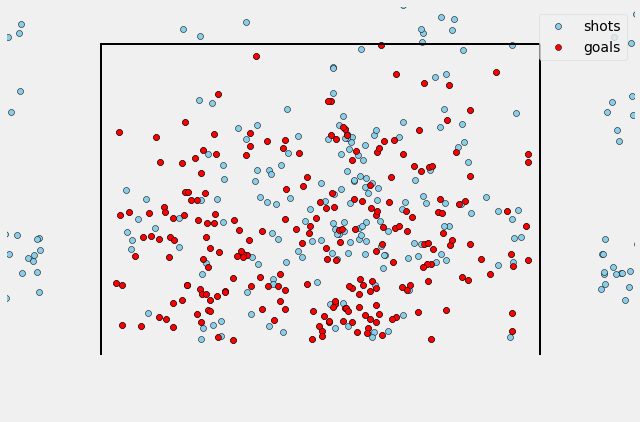

In [11]:
#plotting all data
plt1 = goal_creator()
plt1 = goalplotter1(plt,xg1['goalLoc2'].values,'skyblue','shots')
plt1 = goalplotter1(plt,xg1[xg1['isGoal']==1]['goalLoc2'].values,'red','goals')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('goalmap.png')

### Inference:

* We can observe here that, the shots are more densely packed on the bottom half of the goal, and that very few shots made it to the top corners. The probability of goals being scored however seem to be the even/random throughout.

The probability of a header turning into a goal is 16.67 %.
The probability of a foot shot turning into a goal is 47.99 %.


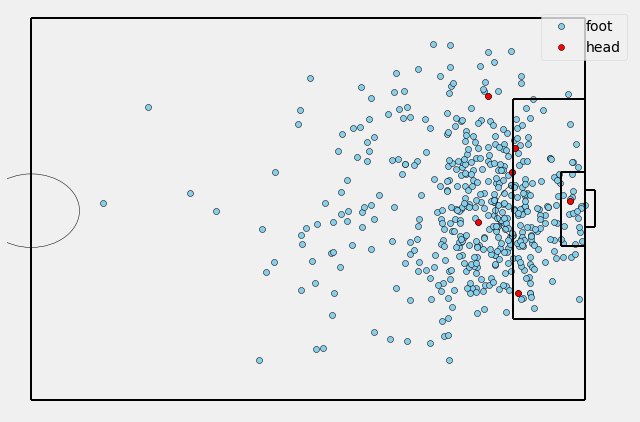

In [12]:
# plotting headers vs footed shots

plt1 = pitch_creator()
plt1 = plotter(plt,xg[['shotY','shotX']].values,'skyblue','foot')
plt1 = plotter(plt,xg[xg['isHeader']==1][['shotY','shotX']].values,'red','head')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('pitchmap.png')
dftest = xg[xg['isHeader']==1]
print("The probability of a header turning into a goal is {}".format(round(dftest.isGoal.mean()*100,2)),"%.")
dftest = xg[xg['isHeader']==0]
print("The probability of a foot shot turning into a goal is {}".format(round(dftest.isGoal.mean()*100,2)),"%.")

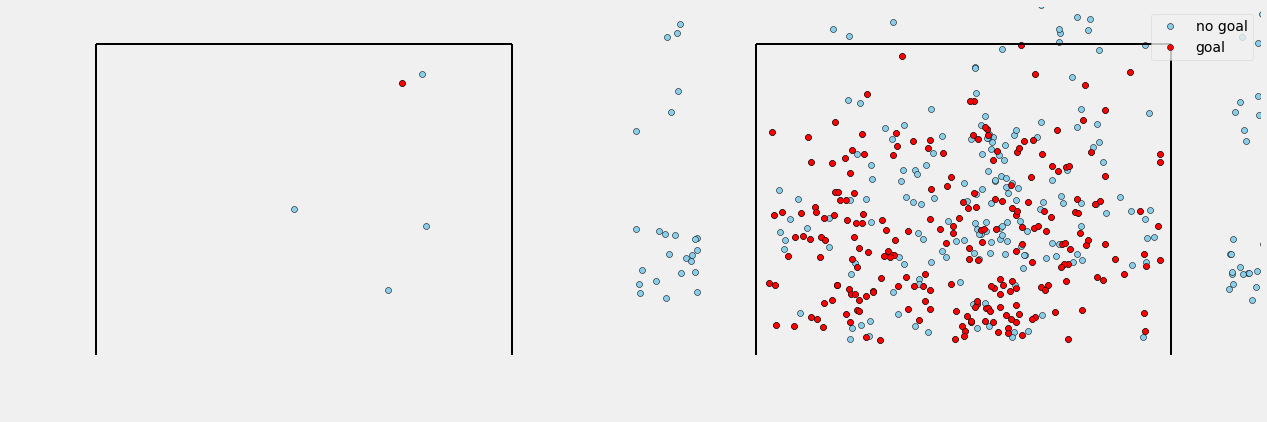

In [13]:
#plotting head vs foot shots data on the goalface
plt1 = goal_creator1()
plt1 = goalplotter1(plt,xg1[xg1['isHeader']==1]['goalLoc2'].values,'skyblue','no goal')
plt1 = goalplotter1(plt,xg1[(xg1['isHeader']==1) & (xg1['isGoal']==1)]['goalLoc2'].values,'red','goal')
plt1 = goalplotter(plt,xg1[xg1['isHeader']==0]['goalLoc2'].values,'skyblue','')
plt1 = goalplotter(plt,xg1[(xg1['isHeader']==0) & (xg1['isGoal']==1)]['goalLoc2'].values,'red','')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('goalmap.png')

<p style="text-align: center;"> Headers (Left) vs Footed Shots (Right) </p>

The probability of a shot originating from a ground pass turning into a goal is 41.07 %.
The probability of a shot originating from an aerial pass turning into a goal is 60.62 %.


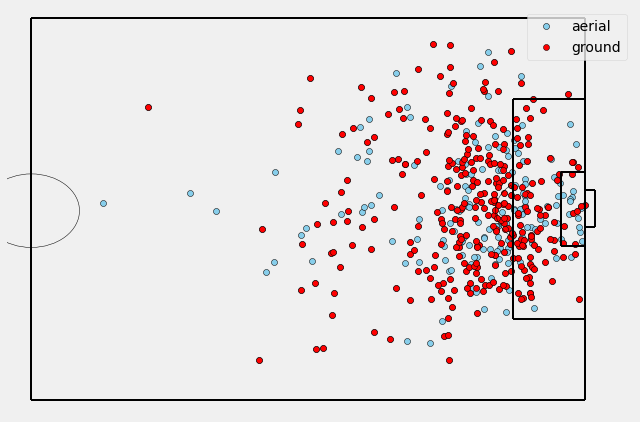

In [14]:
# plotting shots resulting ground and aerial passes

plt1 = pitch_creator()
plt1 = plotter(plt,xg[['shotY','shotX']].values,'skyblue','aerial')
plt1 = plotter(plt,xg[xg['isGround']==1][['shotY','shotX']].values,'red','ground')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('pitchmap.png')
dftest = xg[xg['isGround']==1]
print("The probability of a shot originating from a ground pass turning into a goal is {}".format(round(dftest.isGoal.mean()*100,2)),"%.")
dftest = xg[xg['isGround']==0]
print("The probability of a shot originating from an aerial pass turning into a goal is {}".format(round(dftest.isGoal.mean()*100,2)),"%.")

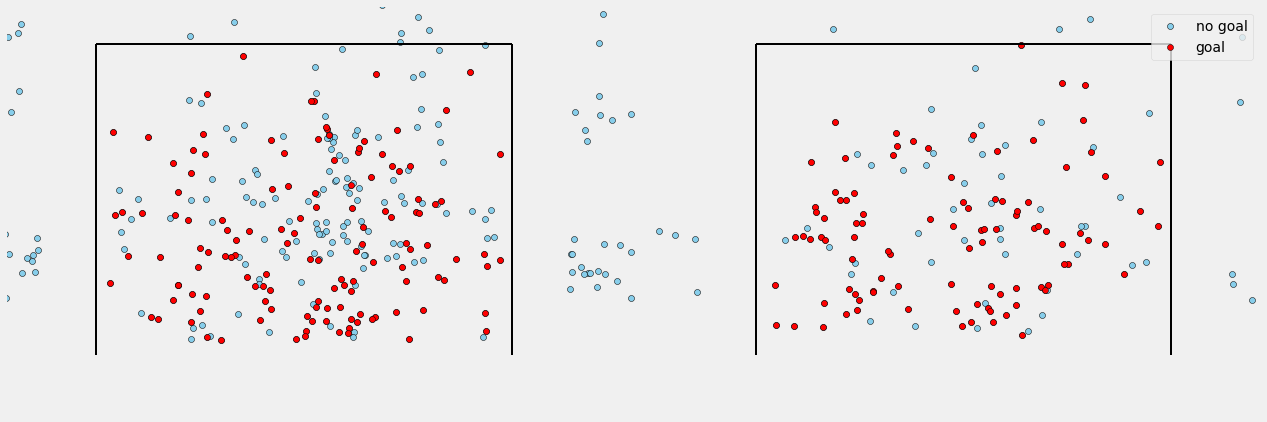

In [15]:
# plotting shots resulting ground and aerial passes on the goalface
plt1 = goal_creator1()
plt1 = goalplotter1(plt,xg1[xg1['isGround']==1]['goalLoc2'].values,'skyblue','no goal')
plt1 = goalplotter1(plt,xg1[(xg1['isGround']==1) & (xg1['isGoal']==1)]['goalLoc2'].values,'red','goal')
plt1 = goalplotter(plt,xg1[xg1['isGround']==0]['goalLoc2'].values,'skyblue','')
plt1 = goalplotter(plt,xg1[(xg1['isGround']==0) & (xg1['isGoal']==1)]['goalLoc2'].values,'red','')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('goalmap.png')

<p style="text-align: center;"> Ground Passes (Left) vs Aerial Passes (Right) </p>

The probability of a shot originating from a through pass turning into a goal is 51.61 %.
The probability of a shot originating from any other pass turning into a goal is 47.32 %.


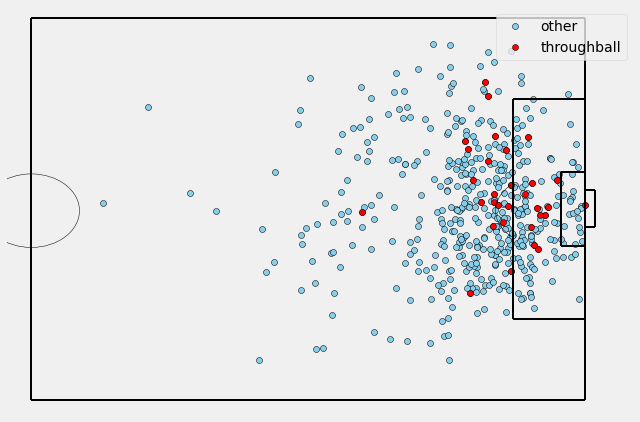

In [16]:
# plotting shots resulting ground and aerial passes

plt1 = pitch_creator()
plt1 = plotter(plt,xg[['shotY','shotX']].values,'skyblue','other')
plt1 = plotter(plt,xg[xg['isThroughball']==1][['shotY','shotX']].values,'red','throughball')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('pitchmap.png')
dftest = xg[xg['isThroughball']==1]
print("The probability of a shot originating from a through pass turning into a goal is {}".format(round(dftest.isGoal.mean()*100,2)),"%.")
dftest = xg[xg['isThroughball']==0]
print("The probability of a shot originating from any other pass turning into a goal is {}".format(round(dftest.isGoal.mean()*100,2)),"%.")

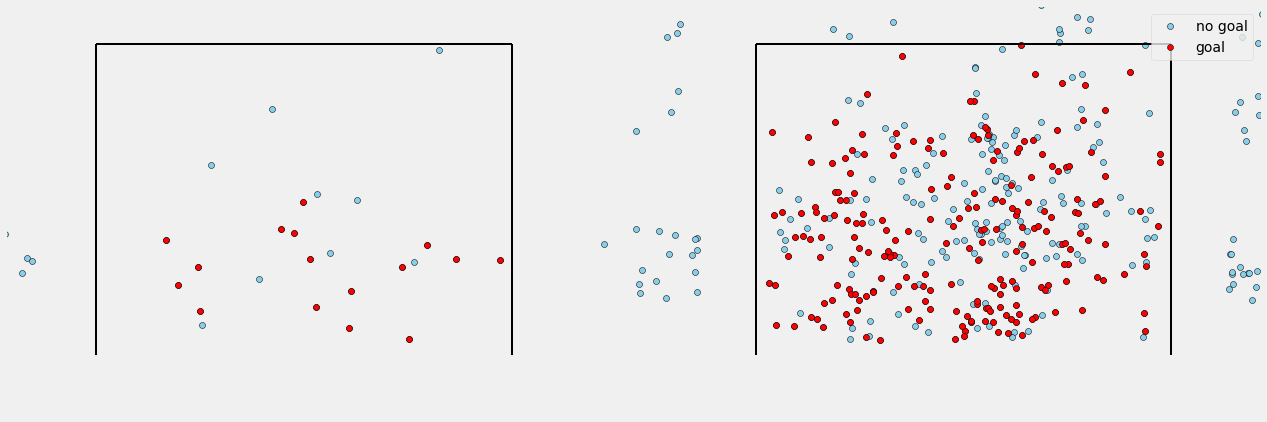

In [17]:
#plotting head vs foot shots data on the goalface
plt1 = goal_creator1()
plt1 = goalplotter1(plt,xg1[xg1['isThroughball']==1]['goalLoc2'].values,'skyblue','no goal')
plt1 = goalplotter1(plt,xg1[(xg1['isThroughball']==1) & (xg1['isGoal']==1)]['goalLoc2'].values,'red','goal')
plt1 = goalplotter(plt,xg1[xg1['isThroughball']==0]['goalLoc2'].values,'skyblue','')
plt1 = goalplotter(plt,xg1[(xg1['isThroughball']==0) & (xg1['isGoal']==1)]['goalLoc2'].values,'red','')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('goalmap.png')

<p style="text-align: center;"> Throughballs (Left) vs Other passes (Right) </p>

### Step 4: Idnetifying the Dependent and Independent Features.

In [18]:
X = xg.drop(['isGoal','goalLoc'], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

         features  vif_factor
0        shotDist    5.766248
1         shotAng   13.537091
2      isOnTarget    4.736319
3        isHeader    1.037577
4     isBigChance    1.616176
5       isCounter    1.024554
6         isTapIn    1.330366
7   isThroughball    1.137702
8        isGround    3.274134
9          minute    5.902656
10          shotX   10.249123
11          shotY   17.408260


In [19]:
X = X.drop(['shotX','shotY'], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

        features  vif_factor
0       shotDist    5.473724
1        shotAng    9.246917
2     isOnTarget    4.162965
3       isHeader    1.024959
4    isBigChance    1.603932
5      isCounter    1.023396
6        isTapIn    1.329746
7  isThroughball    1.129038
8       isGround    2.857474
9         minute    5.101596


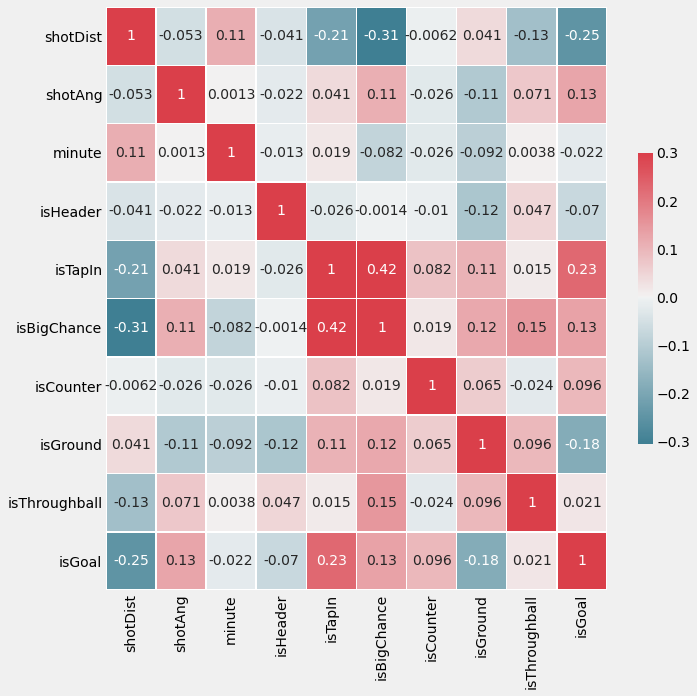

In [20]:
# Making a correlation heatmap.
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(xg1[['shotDist','shotAng','minute','isHeader','isTapIn','isBigChance','isCounter','isGround','isThroughball','isGoal']].corr(),ax=ax,annot=True,vmax=.3, center=0, cmap=cmap, linewidths=.5, cbar_kws={"shrink": .5});

#### Inference:

* We can see that throughballs (weak), counter attacks (medium), and shot angle(medium), big chances (strong), and tap ins (strongest)  are positively correlated with the probability of a shot turning into a goal. 
* We can see that shot distance affects the probability most negatively. This makes sense as the further a shot is, the tougher it is to score.
* We see that headers are tougher to score than footed shots, which usually isn't the case for pro football but since in 5-a-side, the goals are typically smaller, and players are amateurs, this too makes sense.
* We also see that as the minute in which the shot was taken increases, the probability of goals being scored decreases, this can be accounted for by taking fatigue into consideration.